In [16]:
import pyarrow.dataset as ds

dataset = ds.dataset("../output/0.parquet")
dataset.schema

data: list<element: float>
  child 0, element: float
simulation: string
snapshot: int32
subhalo_id: int32
-- schema metadata --
data_shape: '(3, 128, 128)'

In [17]:
import pandas as pd

df = dataset.to_table().to_pandas()
df

,data,simulation,snapshot,subhalo_id
0,"[0.0024285442, 0.0025617976, 0.0022627246, 0.0...",TNG100,99,276100
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",TNG100,99,6


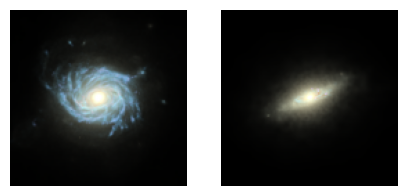

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    data = np.array(df["data"][i]).reshape(3, 128, 128).transpose(1, 2, 0) * 255
    image = Image.fromarray(data.astype(np.uint8), "RGB")
    ax.imshow(image)
    ax.axis("off")
plt.show()